#theoritical information

Support vector machine

Svm(support vector machine) is a machine learning algorithims that works using hyper-plane to classify data. There parameters that affects the efficiency of the model which are:

margin - margin lines are drawn from the datasets to the hyper-plane.
support-vectors: these are the datasets closer to the hyper-plane.
Hyper-plane : this is the line drawn to classifier the datasets.|




In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
#create a dataframe whose information is the data and columns names are thr feature_names

svm_data = pd.DataFrame(iris.data , columns = iris.feature_names)
svm_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
svm_data["target"] = iris.target
svm_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
svm_data[svm_data.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#applying a function over a columns in svm_data
svm_data["flower"] = svm_data.target.apply(lambda x: iris.target_names[x])


In [8]:
svm_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
#visualization
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
svm_data0 = svm_data[svm_data["target"] == 0]
svm_data1 = svm_data[svm_data["target"] == 1]
svm_data2 = svm_data[svm_data["target"] == 2]

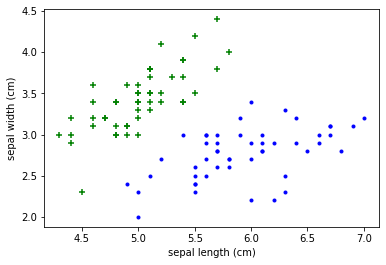

In [12]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(svm_data0["sepal length (cm)"] , svm_data0["sepal width (cm)"] , color = "green" , marker = "+")
plt.scatter(svm_data1["sepal length (cm)"] , svm_data1["sepal width (cm)"] , color = "blue" , marker = ".")


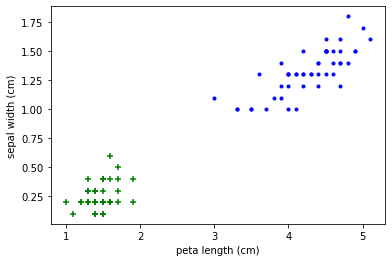

In [13]:
plt.xlabel("peta length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(svm_data0["petal length (cm)"] , svm_data0["petal width (cm)"] , color = "green" , marker = "+")
plt.scatter(svm_data1["petal length (cm)"] , svm_data1["petal width (cm)"] , color = "blue" , marker = ".")


In [14]:
#using the sklearn lets train-test-split our datasets

from sklearn.model_selection import train_test_split


In [15]:
X = svm_data.drop(["target" , "flower"] , axis = "columns")
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y = svm_data["target"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [17]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size = 0.2)


In [18]:
len(x_train)

120

In [19]:
len(x_test)

30

In [20]:
from sklearn.svm import SVC
iris_dt = SVC()

In [21]:
iris_dt.fit(x_train , y_train)

SVC()

In [22]:
iris_dt.score(x_train , y_train)

0.9583333333333334

In [23]:
iris_dt.predict(x_test)

array([2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 1, 2, 1, 2, 0])

In [24]:
iris_dt.score(x_test , y_test)

0.9333333333333333

<h2>Exercise</h2>


In [56]:
from sklearn.datasets import load_digits

hand_digits = load_digits()


In [57]:
dir(hand_digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

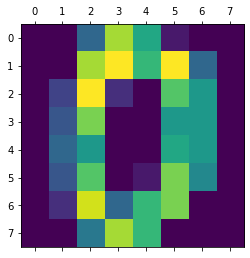

In [58]:
hand_digits.images[0]
plt.matshow(hand_digits.images[0])

In [59]:
hand_digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
hand_digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [61]:
hand_digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [62]:
X = hand_digits.data
y = hand_digits.target

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train , x_test, y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [65]:
len(x_train)

1437

In [66]:
len(x_test)

360

In [67]:
from sklearn.svm import SVC

In [68]:
svm_model = SVC()

In [69]:
svm_model.fit(x_train , y_train)

SVC()

In [70]:
svm_model.score(x_test , y_test)

0.9833333333333333

In [71]:
svm_model.predict(x_test)

array([1, 3, 5, 3, 1, 2, 2, 8, 9, 3, 0, 8, 4, 5, 1, 5, 3, 5, 9, 0, 1, 6,
       7, 8, 3, 5, 6, 7, 0, 6, 0, 5, 7, 1, 7, 2, 0, 1, 1, 8, 6, 6, 4, 3,
       7, 3, 6, 4, 4, 6, 0, 4, 4, 2, 0, 3, 6, 2, 2, 8, 7, 3, 5, 6, 8, 9,
       8, 9, 7, 6, 0, 5, 7, 6, 9, 3, 7, 7, 1, 7, 4, 8, 1, 3, 2, 5, 2, 7,
       0, 5, 1, 4, 9, 6, 3, 2, 6, 9, 5, 2, 9, 3, 7, 2, 3, 4, 4, 7, 1, 9,
       0, 6, 7, 4, 4, 2, 8, 4, 3, 3, 1, 0, 4, 4, 1, 5, 9, 8, 3, 5, 0, 0,
       6, 1, 2, 9, 6, 7, 0, 4, 8, 6, 7, 3, 6, 9, 8, 2, 3, 1, 7, 7, 5, 7,
       8, 8, 0, 5, 3, 2, 5, 8, 1, 4, 4, 1, 9, 8, 8, 4, 1, 7, 8, 7, 4, 5,
       0, 7, 1, 4, 1, 6, 0, 4, 7, 5, 2, 9, 1, 4, 4, 1, 0, 5, 9, 1, 3, 5,
       7, 7, 6, 5, 7, 9, 0, 7, 5, 6, 6, 0, 0, 9, 4, 7, 4, 0, 7, 4, 1, 3,
       0, 6, 1, 3, 1, 1, 9, 9, 0, 2, 3, 6, 8, 2, 4, 1, 9, 2, 6, 4, 4, 4,
       6, 4, 4, 0, 3, 6, 4, 6, 0, 7, 4, 1, 2, 6, 5, 4, 9, 9, 4, 5, 7, 8,
       3, 8, 8, 9, 2, 2, 4, 7, 8, 9, 7, 5, 7, 9, 7, 3, 5, 9, 1, 1, 9, 1,
       7, 5, 2, 1, 8, 1, 5, 3, 4, 2, 2, 5, 6, 5, 8,